In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

import seaborn as sns

# I scraped the movie data for 10 years of top 100 grossing films and can supply the data if needed
df = pd.read_csv('movies.csv')


# **Challenge 1 - Domestic Gross over time**

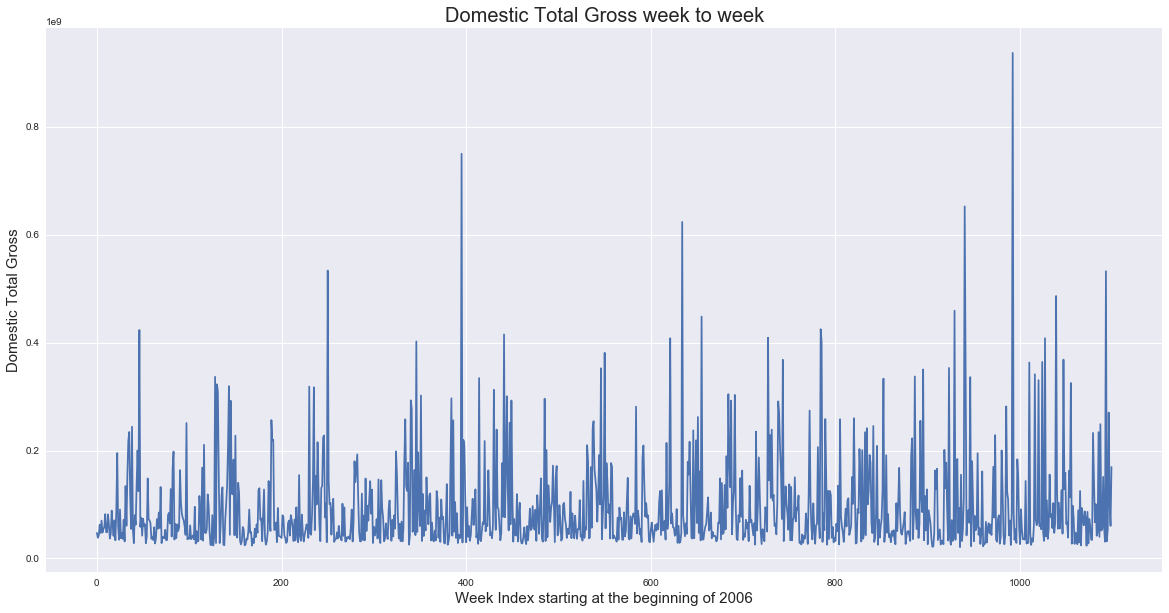

In [6]:
plt.figure(figsize=(20,10))
dfs = df.sort_values(('Release Date'))
plt.title('Domestic Total Gross week to week', fontsize=20)
plt.xlabel('Week Index starting at the beginning of 2006', fontsize=15)
plt.ylabel('Domestic Total Gross', fontsize=15)
plt.plot(list(dfs['Domestic Gross'])[0:]);

# **Challenge 2 - runtime vs. domestic total gross.**

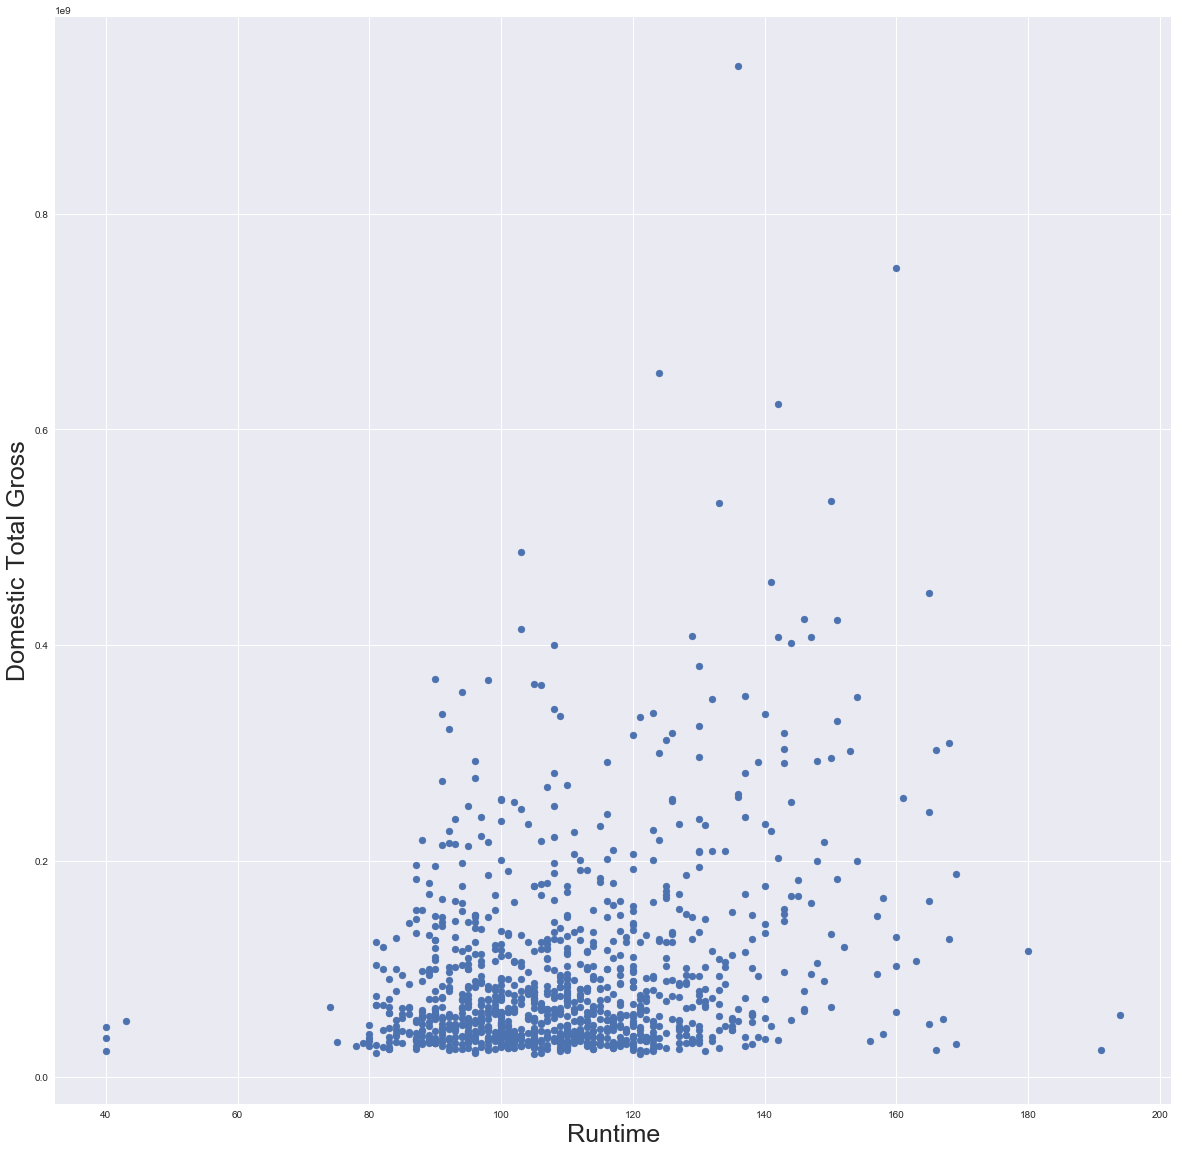

In [690]:
plt.figure(figsize=(20,20))
plt.xlabel('Runtime', fontsize=25)
plt.ylabel('Domestic Total Gross', fontsize=25)

plt.scatter(df['Runtime'], df['Domestic Gross']);


# **Challenge 3 - average runtime and domestic total gross, grouped by rating**

In [707]:
#df.groupby('Rating').agg({'Runtime':'mean', 'Domestic Gross':'mean'})
df.groupby('Rating')['Runtime', 'Domestic Gross'].mean()
pd.set_option('display.float_format', lambda x: '%d' % x)
#pd.reset_option('display.float_format')
df.groupby('Rating')[['Runtime','Domestic Gross']].mean()


,Runtime,Domestic Gross
Rating,,
G,92,101374082
PG,101,112740900
PG-13,113,104012492
R,111,67002617
Unrated,40,23746066


# **Challenge 4 - plot release date vs the domestic total gross, per rating**

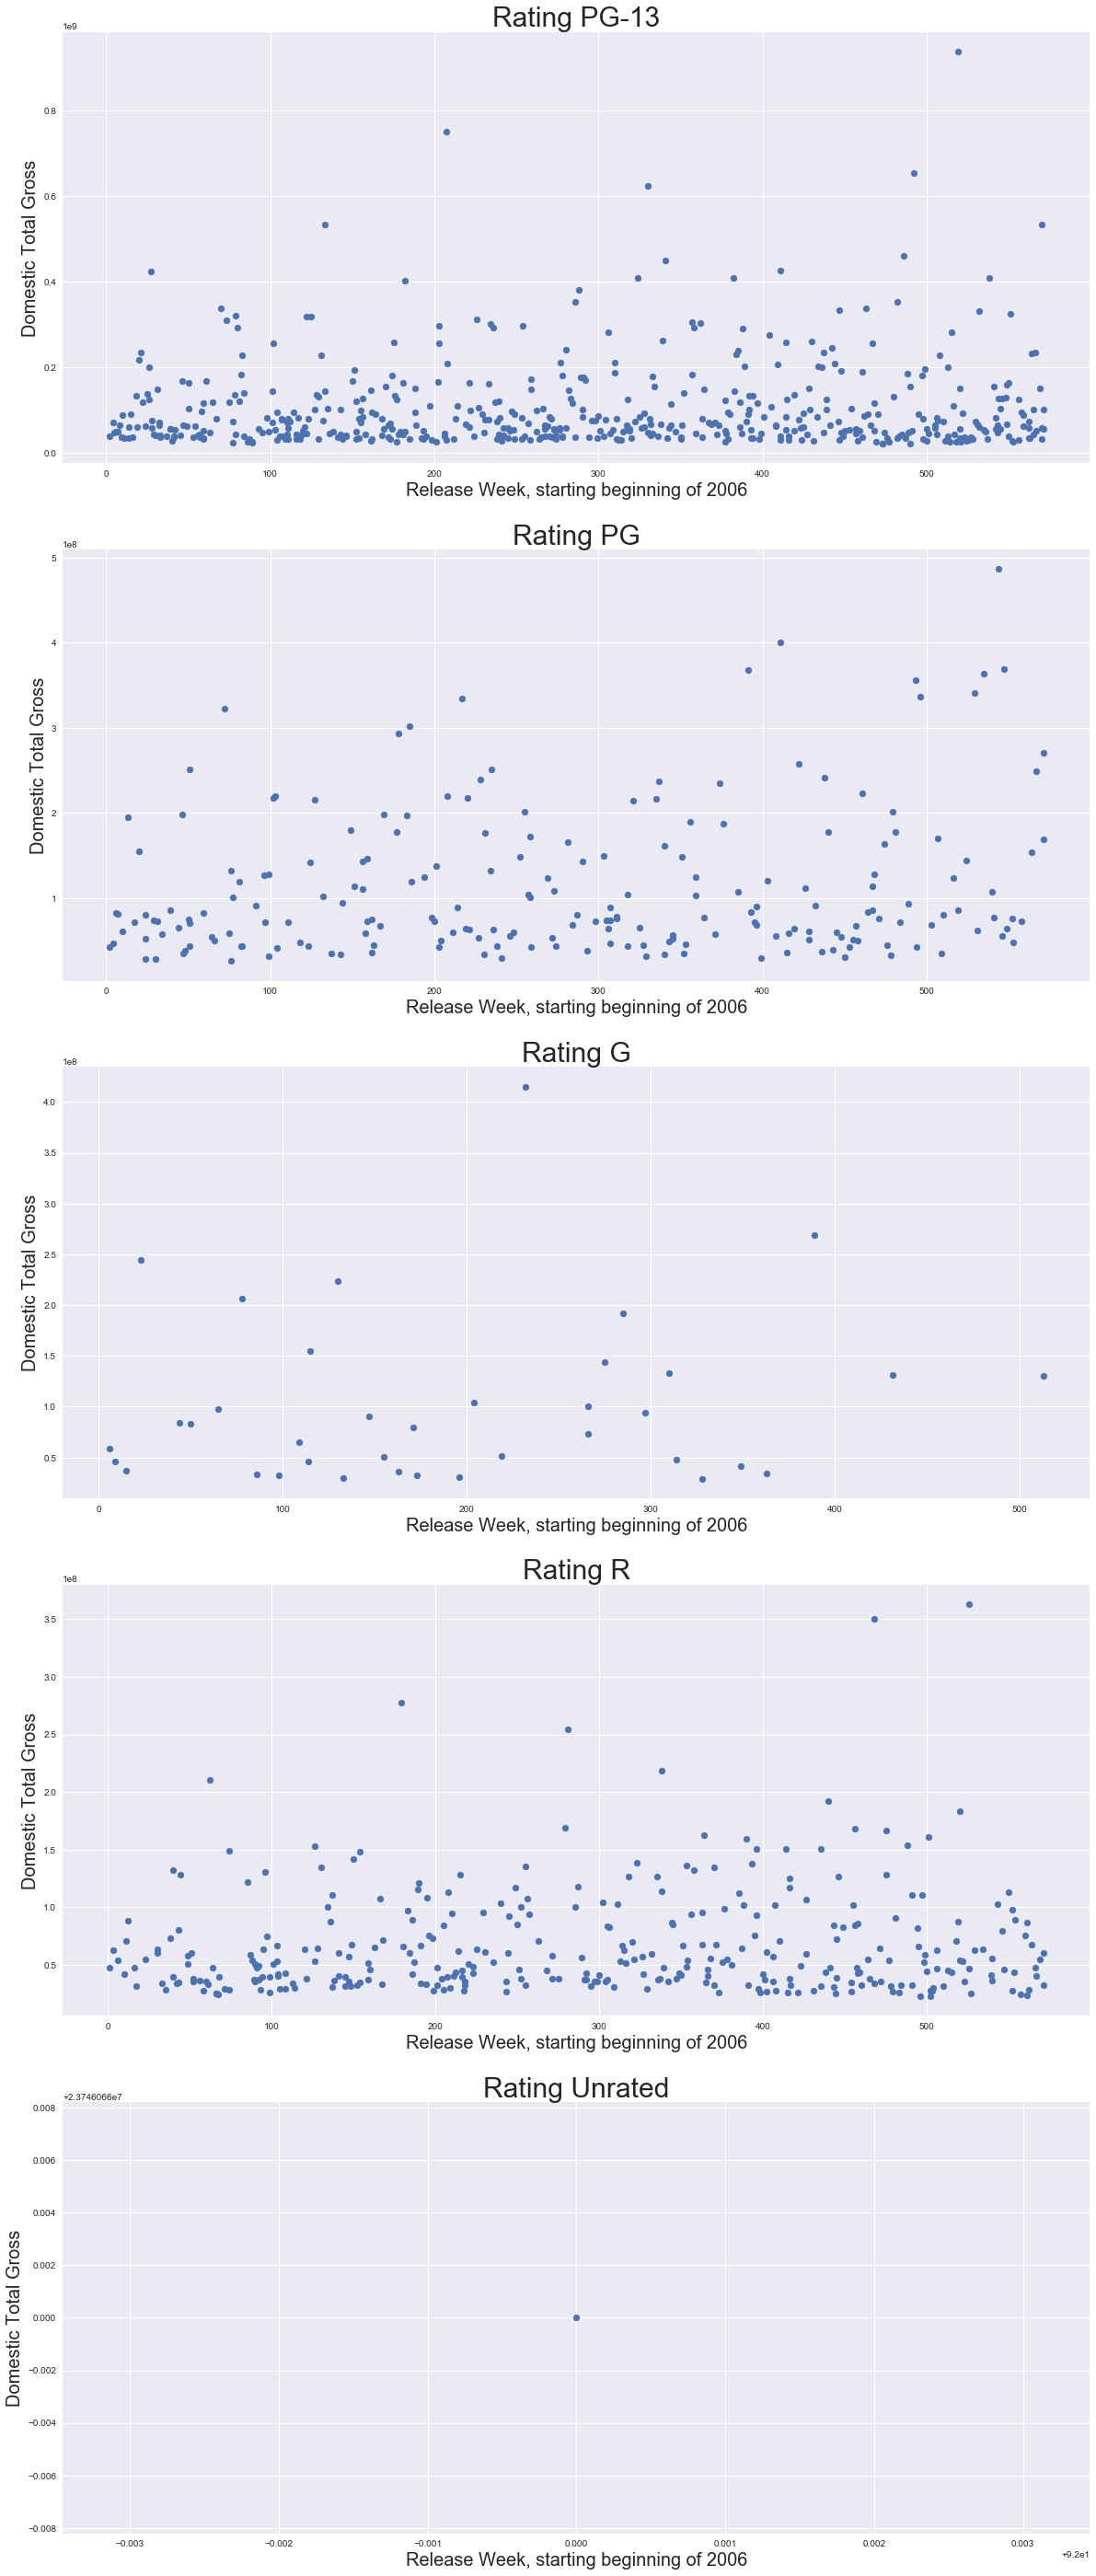

In [778]:
def date_to_integer(dt_time):
    #return 10000*dt_time.year + 100*dt_time.month + dt_time.day
    return 52*(dt_time.year-2006) + dt_time.week

#pd.reset_option('display.float_format')
ratings = df.Rating.unique()

fig, ax = plt.subplots(len(ratings),1, figsize=(20, 10*len(ratings)))

for i in range(len(ratings)):

    dfrating = df[df['Rating']==ratings[i]]
    dfdates = list(dfrating['Release Date'].map(date_to_integer))
    ax[i].scatter(dfdates, dfrating['Domestic Gross'])
    ax[i].set_xlabel('Release Week, starting beginning of 2006', fontsize=20)
    ax[i].set_ylabel('Domestic Total Gross', fontsize=20)
    ax[i].set_title('Rating '+ratings[i], fontsize=30);

# **Challenge 5 - director with highest average gross per movie**

In [777]:
pd.set_option('display.float_format', lambda x: '%d' % x)
df.groupby('Director')['Domestic Gross'].mean().sort_values(ascending=False).head(10)

Director
James Cameron     749766139
Colin Trevorrow   652270625
Joss Whedon       541181889
Lee Unkrich       415004880
Gary Ross         408010692
Gareth Edwards    366426696
Tim Miller        363070709
J.J. Abrams       336840977
James Gunn        333176600
Pete Docter       324732937
Name: Domestic Gross, dtype: float64

# **Challenge 6 - Mean domestic total gross per month**

In [783]:
pd.reset_option('display.float_format')

In [791]:
def date_to_month(dt_time):
    #return 10000*dt_time.year + 100*dt_time.month + dt_time.day
    return 12*(dt_time.year-2006) + dt_time.month
dfsBack = dfs[:]
dfs['Release Date'] = dfs['Release Date'].map(date_to_month)
dfs.head()

,Title,Rating,Genre,Director,Producer,Foreign Gross,Opening Weekend,Widest Release,Budget,Release Date,Domestic Gross,Runtime
66,Hostel,R,Horror,Eli Roth,,3.325e+07,19556099,2337,4.800e+06,1,47326473,95
80,Last Holiday,PG-13,Comedy / Drama,Wayne Wang,Laurence Mark,4.943e+06,12806188,2514,4.500e+07,1,38399961,112
71,Glory Road,PG,Sports Drama,,Jerry Bruckheimer,2.910e+05,13594734,2397,NaN,1,42647449,106
46,Underworld: Evolution,R,Action Horror,Len Wiseman,Gary Lucchesi,4.902e+07,26857181,3207,NaN,1,62318875,106
67,Nanny McPhee,PG,Family,Kirk Jones,Tim Bevan,7.535e+07,14503650,2148,2.500e+07,1,47144110,98


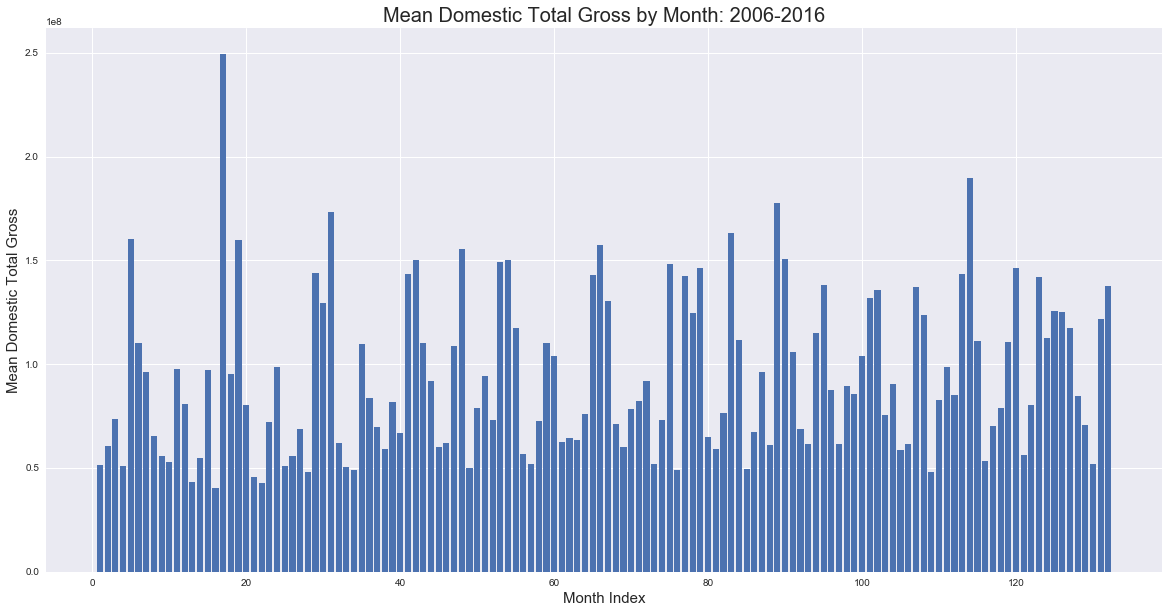

In [811]:
pd.set_option('display.float_format', lambda x: '%d' % x)

dfmg = dfs.groupby('Release Date')['Domestic Gross'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.xlabel('Month Index',fontsize=15)
plt.ylabel('Mean Domestic Total Gross',fontsize=15)
plt.title('Mean Domestic Total Gross by Month: 2006-2016', fontsize=20)
plt.bar(list(dfmg['Release Date'])[0:], list(dfmg['Domestic Gross'])[0:]);
